In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [15]:
dataset=pd.read_csv(r'C:\Users\USER\Downloads\weatherHistory.csv\weatherHistory.csv')

In [16]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [18]:
dataset.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [19]:
dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [20]:
dataset.dropna(axis=1,inplace=True)

In [21]:
dataset.isnull().sum()

Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [22]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [24]:
dataset['Summary'].value_counts(normalize=True)

Summary
Partly Cloudy                          0.329000
Mostly Cloudy                          0.291271
Overcast                               0.172073
Clear                                  0.112905
Foggy                                  0.074109
Breezy and Overcast                    0.005474
Breezy and Mostly Cloudy               0.005350
Breezy and Partly Cloudy               0.004002
Dry and Partly Cloudy                  0.000892
Windy and Partly Cloudy                0.000695
Light Rain                             0.000653
Breezy                                 0.000560
Windy and Overcast                     0.000467
Humid and Mostly Cloudy                0.000415
Drizzle                                0.000404
Breezy and Foggy                       0.000363
Windy and Mostly Cloudy                0.000363
Dry                                    0.000353
Humid and Partly Cloudy                0.000176
Dry and Mostly Cloudy                  0.000145
Rain                            

In [25]:
dataset=dataset.drop(['Formatted Date','Temperature (C)','Loud Cover','Daily Summary'],axis=1)

In [26]:
dataset.head(3)

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,9.377778,0.89,3.9284,204.0,14.9569,1015.94


<Axes: >

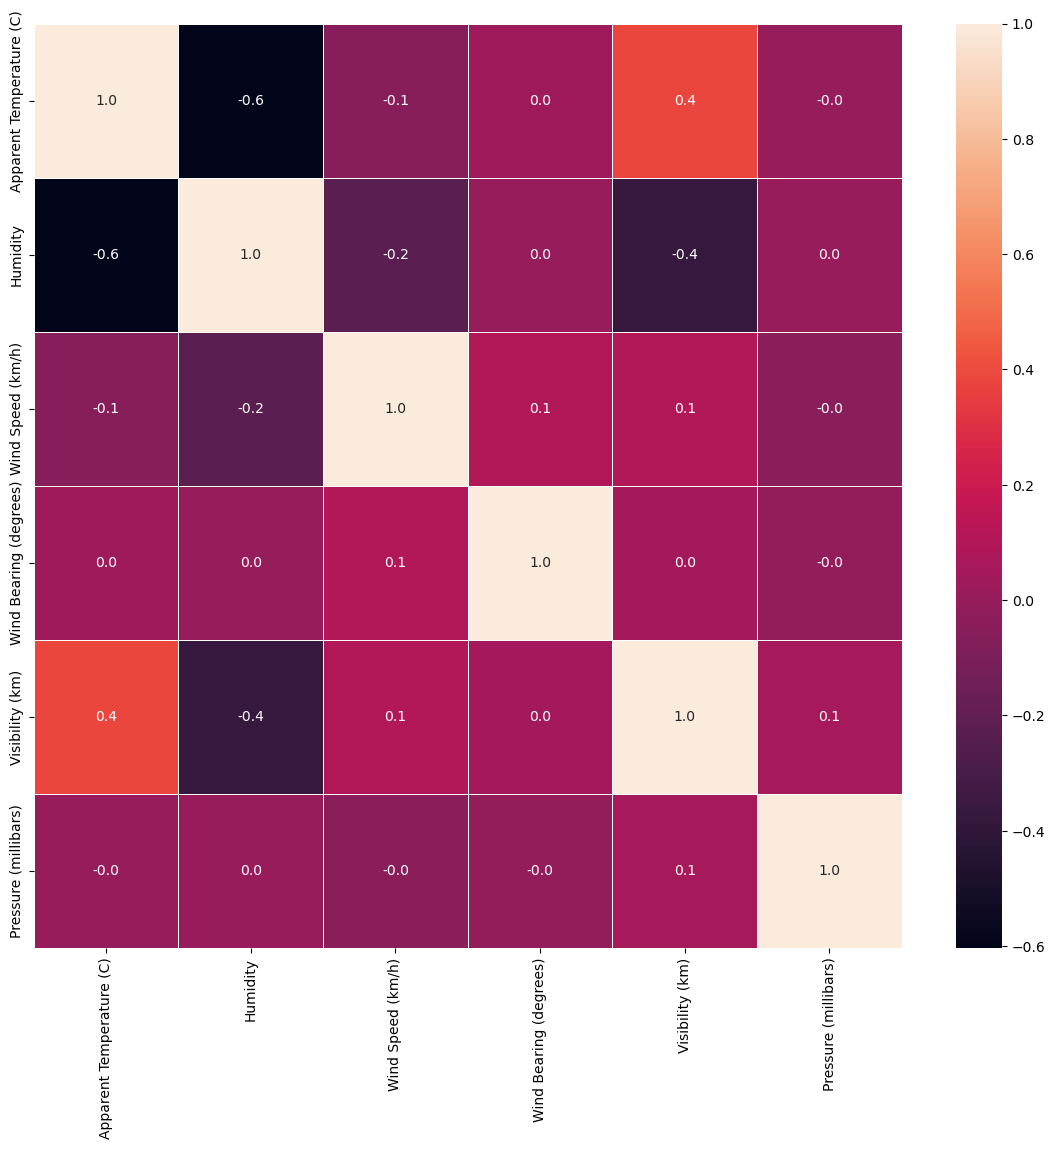

In [29]:
f,ax=plt.subplots(figsize=(14,12))
numeric_dataset=dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_dataset.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)


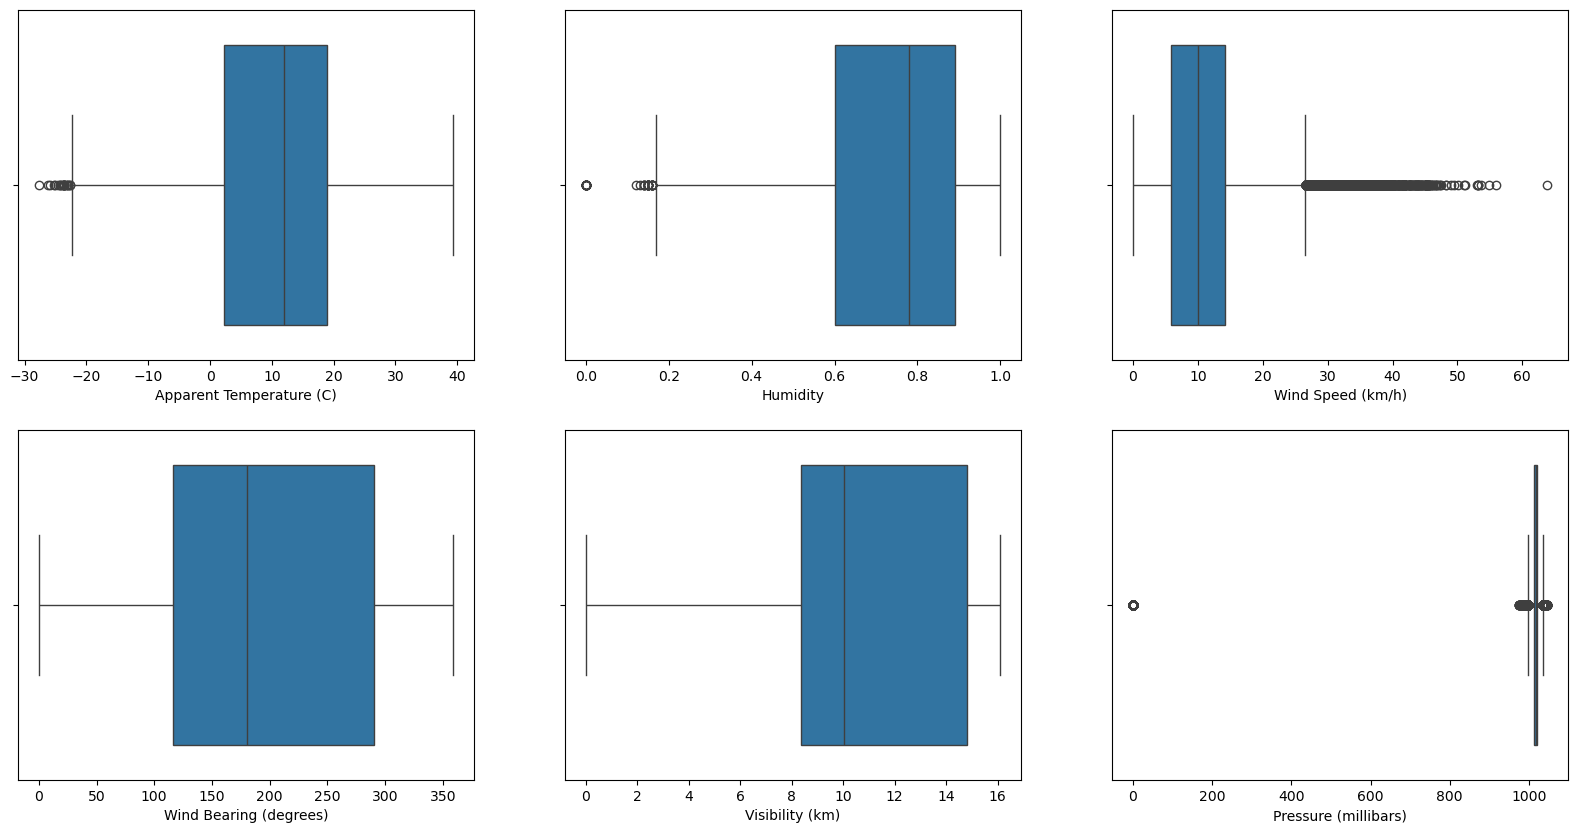

In [33]:
num_atts=dataset.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(int(np.ceil(len(num_atts)/3)), 3, figsize = (20, 10))
for i, att in zip(range(len(num_atts)), num_atts):
    sns.boxplot(ax = axes[int(np.floor(i/3))][i%3], 
                x = att, data = dataset)

<Axes: xlabel='Apparent Temperature (C)', ylabel='Count'>

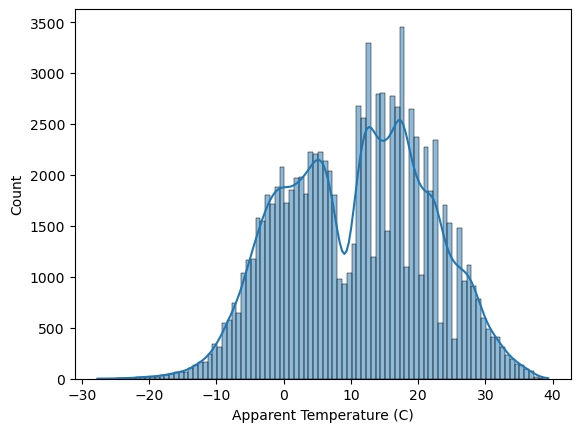

In [34]:
sns.histplot(dataset['Apparent Temperature (C)'], kde = True)

In [36]:
iqr = dataset['Apparent Temperature (C)'].quantile(0.75) - dataset['Apparent Temperature (C)'].quantile(0.25)
l1 = dataset['Apparent Temperature (C)'].quantile(0.25) - 1.5*iqr
l2 = dataset['Apparent Temperature (C)'].quantile(0.75) + 1.5*iqr

data_1 = dataset[np.logical_and(dataset['Apparent Temperature (C)'] < l2, dataset['Apparent Temperature (C)'] > l1)]
data_1.describe(include = 'all')

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96431,96431.000000,96431.000000,96431.000000,96431.000000,96431.000000,96431.000000
unique,27,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,31732,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.863018,0.734916,10.810448,187.518267,10.348691,1003.230404
std,NaN,10.684965,0.195434,6.913872,107.382246,4.191327,116.982615
min,NaN,-22.416667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.316667,0.600000,5.828200,116.000000,8.355900,1011.900000
50%,NaN,12.005556,0.780000,9.965900,180.000000,10.046400,1016.440000
75%,NaN,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000


<Axes: xlabel='Apparent Temperature (C)', ylabel='Count'>

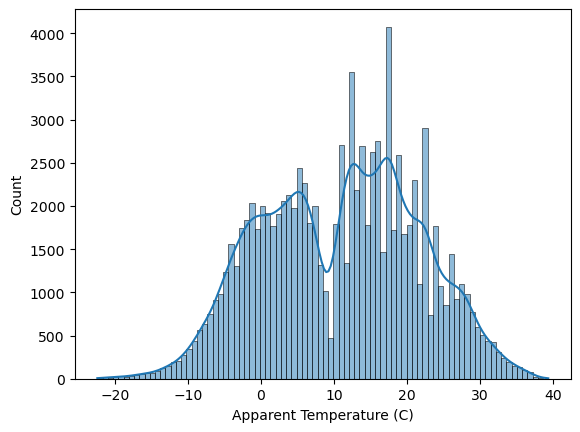

In [37]:
sns.histplot(data_1['Apparent Temperature (C)'], kde = True)

<Axes: xlabel='Humidity', ylabel='Count'>

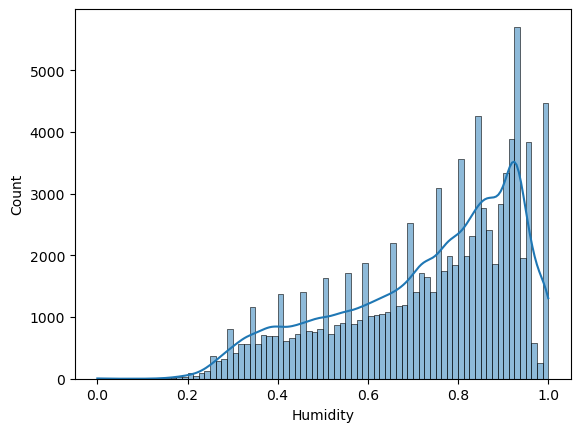

In [38]:
sns.histplot(data_1['Humidity'], kde = True)

In [39]:
iqr=data_1['Humidity'].quantile(0.75) - data_1['Humidity'].quantile(0.25)
l1 = data_1['Humidity'].quantile(0.25) - 1.5*iqr
l2 = data_1['Humidity'].quantile(0.75) + 1.5*iqr
data_2 = data_1[np.logical_and(data_1['Humidity'] < l2, data_1['Humidity'] > l1)]
data_2.describe(include = 'all')

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96389,96389.000000,96389.000000,96389.000000,96389.000000,96389.000000,96389.000000
unique,27,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,31719,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.864050,0.735199,10.808831,187.535704,10.349352,1003.222606
std,NaN,10.675442,0.195000,6.912179,107.378340,4.191449,117.007294
min,NaN,-22.416667,0.170000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.316667,0.600000,5.828200,116.000000,8.355900,1011.900000
50%,NaN,12.005556,0.780000,9.949800,180.000000,10.046400,1016.440000
75%,NaN,18.838889,0.890000,14.135800,290.000000,14.812000,1021.080000


<Axes: xlabel='Humidity', ylabel='Count'>

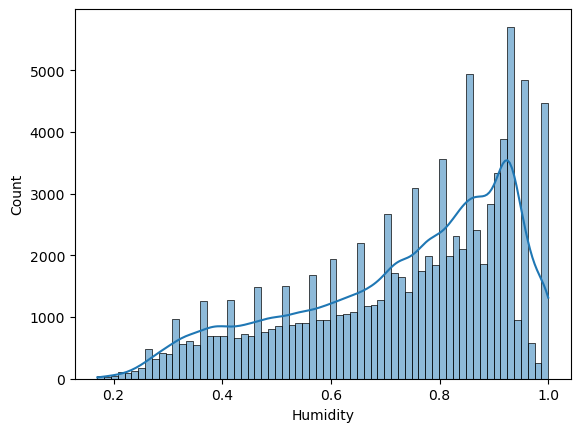

In [40]:
sns.histplot(data_2['Humidity'], kde = True)

<Axes: xlabel='Wind Speed (km/h)', ylabel='Count'>

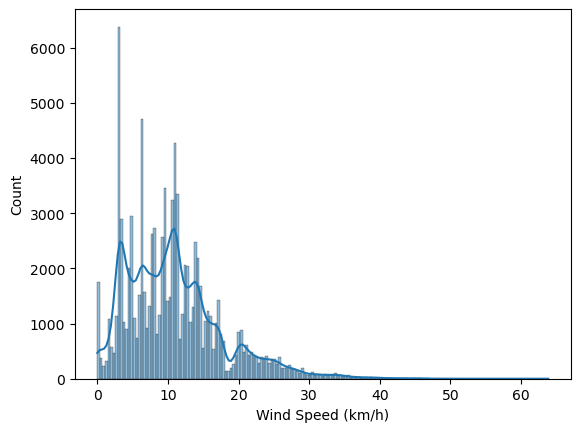

In [41]:
sns.histplot(data_2['Wind Speed (km/h)'], kde = True)

In [42]:
iqr = data_2['Wind Speed (km/h)'].quantile(0.75) - data_2['Wind Speed (km/h)'].quantile(0.25)
l1 = data_2['Wind Speed (km/h)'].quantile(0.25) - 1.5*iqr
l2 = data_2['Wind Speed (km/h)'].quantile(0.75) + 1.5*iqr

data_3 = data_2[np.logical_and(data_2['Wind Speed (km/h)'] < l2, data_2['Wind Speed (km/h)'] > l1)]
data_3.describe(include = 'all')

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,93365,93365.000000,93365.000000,93365.000000,93365.000000,93365.000000,93365.000000
unique,14,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,31362,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.982132,0.737852,10.138755,186.277331,10.326939,1003.976589
std,NaN,10.674144,0.194946,5.860563,107.230650,4.222734,114.523932
min,NaN,-22.416667,0.170000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.422222,0.610000,5.490100,112.000000,8.194900,1012.090000
50%,NaN,12.105556,0.790000,9.660000,180.000000,10.030300,1016.560000
75%,NaN,18.877778,0.900000,13.829900,289.000000,14.876400,1021.180000


<Axes: xlabel='Wind Speed (km/h)', ylabel='Count'>

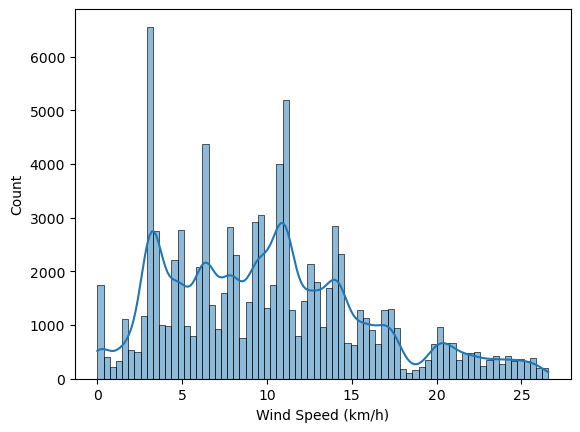

In [43]:
sns.histplot(data_3['Wind Speed (km/h)'], kde = True)

<Axes: xlabel='Visibility (km)', ylabel='Count'>

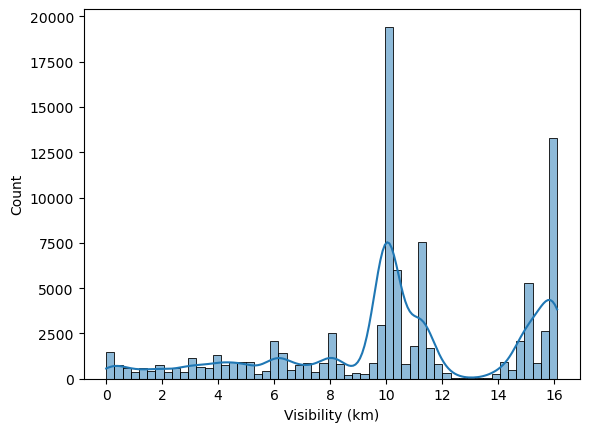

In [44]:
sns.histplot(data_3['Visibility (km)'], kde = True)

<Axes: xlabel='Pressure (millibars)', ylabel='Count'>

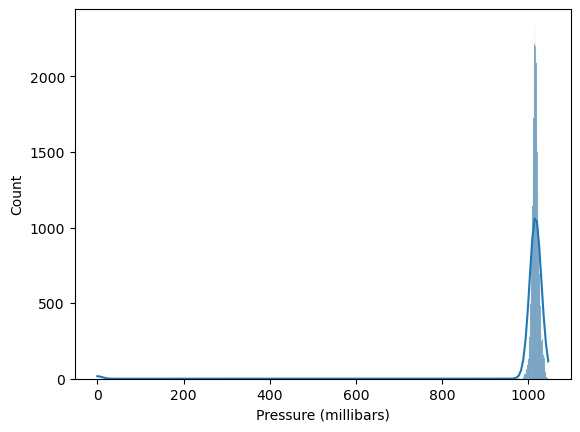

In [45]:
sns.histplot(data_3['Pressure (millibars)'], kde = True)

In [46]:
iqr = data_3['Pressure (millibars)'].quantile(0.75) - data_3['Pressure (millibars)'].quantile(0.25)
l1 = data_3['Pressure (millibars)'].quantile(0.25) - 1.5*iqr
l2 = data_3['Pressure (millibars)'].quantile(0.75) + 1.5*iqr

data_4 = data_3[np.logical_and(data_3['Pressure (millibars)'] < l2, data_3['Pressure (millibars)'] > l1)]
data_4.describe(include = 'all')

,Summary,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,89195,89195.000000,89195.000000,89195.000000,89195.00000,89195.000000,89195.000000
unique,14,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,30831,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.378245,0.734297,10.142926,186.56539,10.457253,1016.797165
std,NaN,10.555733,0.195878,5.833652,107.26942,4.172349,6.743101
min,NaN,-22.416667,0.170000,0.000000,0.00000,0.000000,998.460000
25%,NaN,2.955556,0.600000,5.602800,113.00000,8.790600,1012.360000
50%,NaN,12.288889,0.780000,9.660000,180.00000,10.046400,1016.590000
75%,NaN,19.005556,0.890000,13.829900,289.00000,14.908600,1020.960000


<Axes: xlabel='Pressure (millibars)', ylabel='Count'>

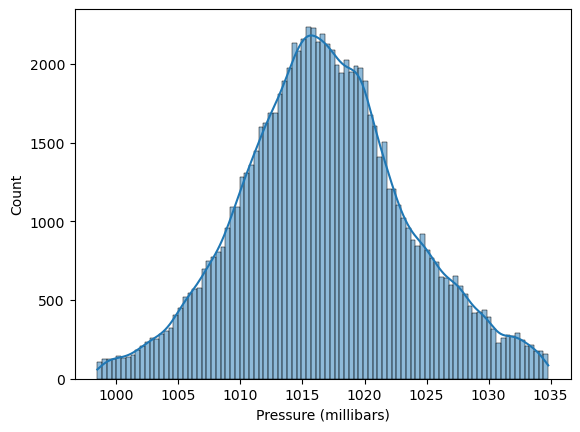

In [47]:
sns.histplot(data_4['Pressure (millibars)'], kde = True)

In [48]:
data_cleaned = data_4.reset_index(drop = True)

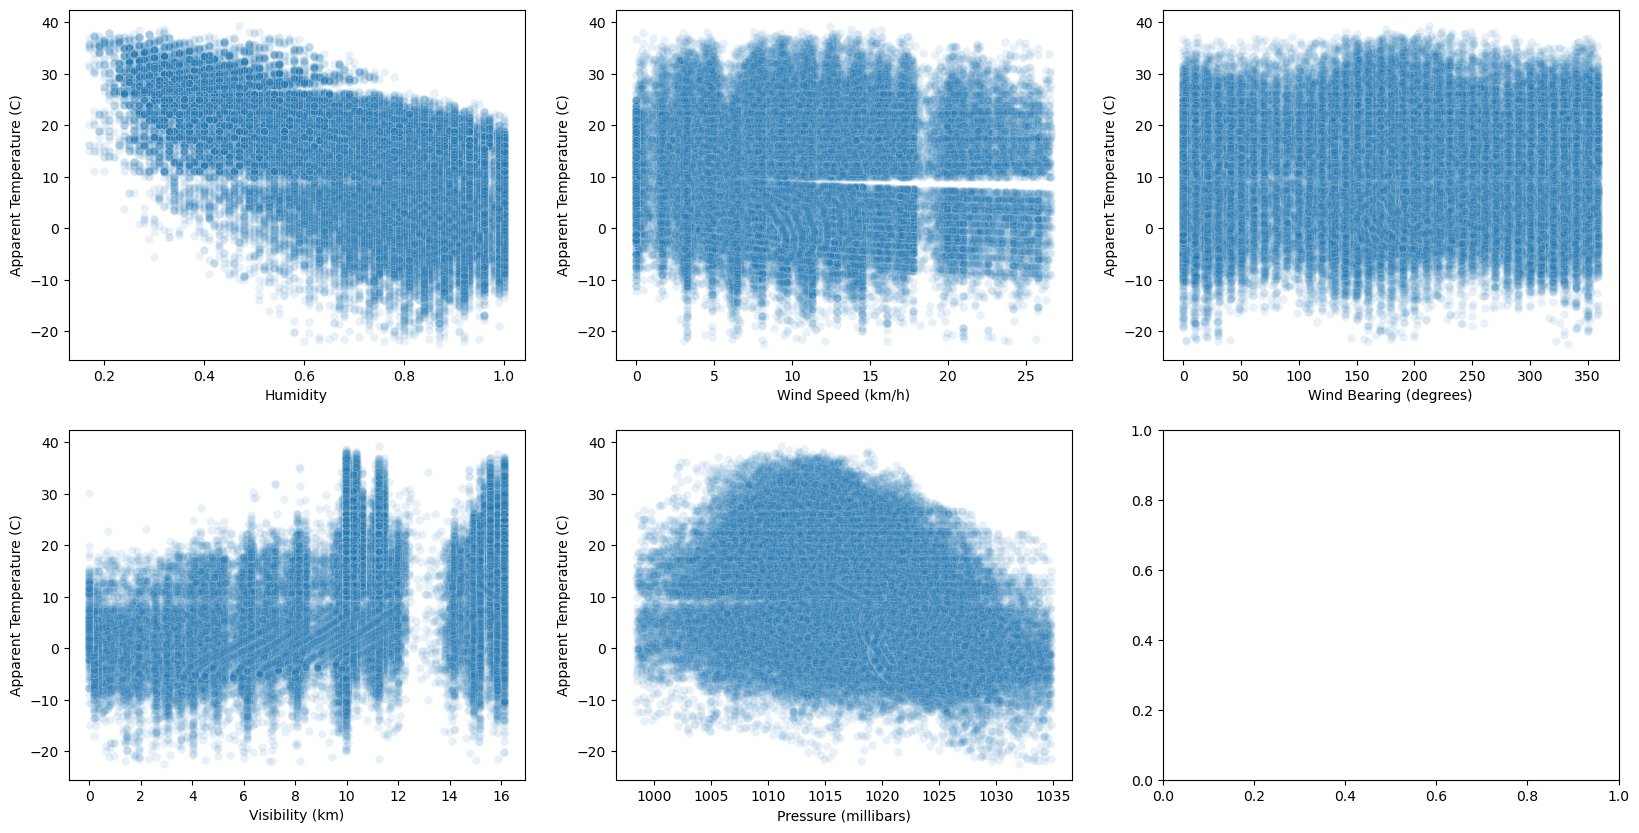

In [49]:
num_atts = data_cleaned.select_dtypes(exclude=['object']).columns
num_atts = num_atts.delete(0) 
fig, axes = plt.subplots(int(np.ceil(len(num_atts)/3)), 3, figsize = (20, 10))
for i, att in zip(range(len(num_atts)), num_atts):
    sns.scatterplot(ax = axes[int(np.floor(i/3))][i%3], 
                    x = att, y = 'Apparent Temperature (C)', data = data_cleaned,
                    alpha = 0.1)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[num_atts]
vif = pd.DataFrame()
vif['features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif

,features,VIF
0,Humidity,18.060635
1,Wind Speed (km/h),4.240128
2,Wind Bearing (degrees),4.063724
3,Visibility (km),8.352817
4,Pressure (millibars),40.001898


In [51]:
data_no_multicollinearity = data_3.copy()
data_no_multicollinearity = data_no_multicollinearity.drop(['Pressure (millibars)'], axis = 1)

In [52]:
data_preprocessed = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_preprocessed.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain
0,7.388889,0.89,14.1197,251.0,15.8263,False,False,False,False,False,False,False,False,False,False,False,True,False
1,7.227778,0.86,14.2646,259.0,15.8263,False,False,False,False,False,False,False,False,False,False,False,True,False
2,9.377778,0.89,3.9284,204.0,14.9569,False,False,False,False,False,False,False,False,False,True,False,False,False
3,5.944444,0.83,14.1036,269.0,15.8263,False,False,False,False,False,False,False,False,False,False,False,True,False
4,6.977778,0.83,11.0446,259.0,15.8263,False,False,False,False,False,False,False,False,False,True,False,False,False


In [53]:
targets = data_preprocessed['Apparent Temperature (C)']
inputs = data_preprocessed.drop(['Apparent Temperature (C)'], axis = 1)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2)

In [56]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [57]:
y_hat = reg.predict(x_train)

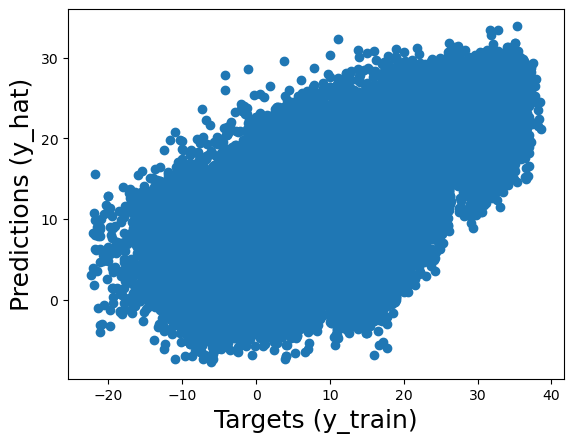

In [58]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

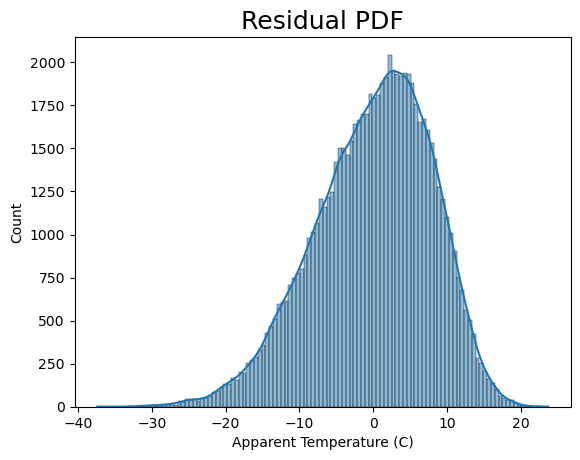

In [59]:
sns.histplot((y_train - y_hat), kde = True)
plt.title('Residual PDF', size = 18)

In [60]:
reg.score(x_train, y_train)

0.4482189689958068

In [61]:
reg.intercept_

10.984619623051874

In [62]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary


,Features,Weights
0,Humidity,-5.951366
1,Wind Speed (km/h),-1.931197
2,Wind Bearing (degrees),0.391502
3,Visibility (km),1.641802
4,Summary_Drizzle,0.116429
5,Summary_Dry,0.073815
6,Summary_Dry and Mostly Cloudy,0.016514
7,Summary_Dry and Partly Cloudy,0.024344
8,Summary_Foggy,-0.240221
9,Summary_Humid and Mostly Cloudy,0.311233
